In [1]:
import pandas as pd

In [2]:

df = pd.read_csv('recons-sab-bma.csv')


In [3]:
df


,Refs,Reads
0,ACCATAATGCGTGGGGCCGACCTCGGAATGCGGTCTCCATGCGCGT...,ACCATAATGCGTGGGGCCGACCTCGGAATGCGGTCTCCATGCGCGT...
1,TCGAAGCAGTAGGGCCTACCAAATAGGTTGGTCCTCCGTTGTATCT...,TCGAAGCAGTAGGGCCTACCAAATAGGTTGGTCCTCCGTTGTATCT...
2,AGTTAACGTCCCACGGCGAGGCACTCTTGATCCCCACCTTCAAGAG...,AGTTAACGTCCCACGGCGAGGCACTCTTGATCCCCACCTTCAAGAG...
3,GCCCAAGGGTACGCCCGCAGCGACGCAATTGGCGGAGTAAGCGCGT...,GCCCAAGGGTACGCCCGCAGCGACGCAATTGGCGGAGTAAGCGCGT...
4,GCACTGATGTAACTCATGGTACATCCGTCGCTGAGCGCCATTTTGT...,GCACTGATGTAACTCATGGTACATCCGTCTGAGCGCCATTTTGTTA...
...,...,...
9995,GCATGATTTGGAAGGTCGGCACTATACCCACCCAGGGTATATGGTC...,GCATGATTTGGAAGGTCGGCACTATACCCACCCAGGGTATATGGTC...
9996,GAAGTTTGGAACGTGTTCGTCCGCCAATTAAGGTTGGCTTCTAGTA...,GAAGTTTGGAACGTGTTCGTCCGCCAATTAAGGTTGGCTTCTAGTA...
9997,TGCATCCCGGACAACCGCAAGGGTGCATGGGCACCGCAATTCCCAA...,TGCATCCCGGACAACCGCAAGGGTGCATGGGCACCGCAATTCCCAA...
9998,ACTGGACGTCCTATGCTGGCATAATGAAACGACAACCTGTCTTCGA...,ACTGGACGTCCTATGCTGGCATAATGAAACGACAACCTGTCTTCGA...


In [4]:
from tqdm import tqdm


In [5]:
noisy_strands = [s.strip() for s in list(df['Reads'])]


In [6]:
ref_strands = [s.strip() for s in list(df['Refs'])]


In [7]:
import difflib


In [8]:
import matplotlib.pyplot as plt
import numpy as np
import os

# use LaTeX fonts in the plot
plt.rc('text', usetex=True)
plt.rc('font', family='serif')
os.environ["PATH"] += os.pathsep + '/usr/local/texlive/2021basic/bin/universal-darwin'

In [9]:
def print_diff(ref_strand, noisy_strand):
    global pairs
    global pairs_no_pos
    a, b = 0, 0

    # quadratic time, no heuristics
    for match in difflib.SequenceMatcher(None, ref_strand, noisy_strand, autojunk=False).get_matching_blocks():
        was = ref_strand[a:match.a]
        now = noisy_strand[b:match.b]
        
        a = match.a + match.size
        b = match.b + match.size
        
        if was == '' and now == '':
            pass
        else:
            # print('{}|{}'.format(was, now), end=', ')
            pairs += [(was, now, match.a)]
            pairs_no_pos += [(was, now)]



100%|██████████| 10000/10000 [00:00<00:00, 91055.62it/s]


[1, 1, 3, 2, 2, 4, 6, 3, 7, 7, 7, 8, 9, 9, 16, 9, 17, 19, 17, 18, 19, 23, 27, 35, 30, 33, 31, 30, 36, 32, 39, 40, 40, 44, 37, 55, 51, 54, 60, 64, 67, 60, 59, 63, 72, 75, 90, 87, 88, 96, 98, 94, 98, 114, 119, 453, 434, 425, 439, 428, 418, 425, 426, 416, 396, 434, 410, 402, 393, 419, 400, 393, 394, 386, 394, 394, 397, 383, 387, 366, 375, 376, 377, 385, 358, 366, 344, 370, 357, 345, 348, 367, 356, 351, 350, 366, 352, 336, 349, 328, 340, 342, 346, 347, 354, 338, 373, 356, 329, 223]


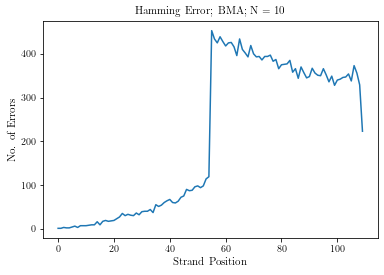

In [10]:
# Hamming Distance Graph
strand_len = 110
count_pos = [0] * (strand_len + 1)

def hamming(ref_strand, recons_strand):
    for i, (c1, c2) in enumerate(zip(ref_strand, recons_strand)):
        if c1 != c2:
            count_pos[i] += 1

for i in tqdm(range(len(ref_strands))):
    hamming(ref_strands[i], noisy_strands[i])

print(count_pos[:-1])
f = plt.figure()
plt.plot(range(strand_len), count_pos[:-1])
plt.title(r'Hamming Error; BMA; N = 10', fontsize=11)
plt.xlabel(r'Strand Position', fontsize=11)
plt.ylabel(r'No. of Errors', fontsize=11)
plt.show()
f.savefig('cov10-sab-bma-hamming.pdf', bbox_inches='tight')

In [11]:
pairs = []
pairs_no_pos = []

for i in tqdm(range(len(ref_strands))):
    if ref_strands[i] != noisy_strands[i]:
        print_diff(ref_strands[i], noisy_strands[i])


100%|██████████| 10000/10000 [00:00<00:00, 11999.61it/s]


In [12]:

subs_no_pos, counts_no_pos = np.unique(pairs_no_pos, return_counts=True, axis=0)
sorting = np.argsort(counts_no_pos)
subs_no_pos = subs_no_pos[sorting]
counts_no_pos = counts_no_pos[sorting]

for sub, count in zip(subs_no_pos, counts_no_pos):
    if count > 5:
        print("{} -> {}".format(sub[0], sub[1]), count)


AG ->  6
 -> CC 6
 -> AG 6
TT ->  6
 -> AA 6
 -> TC 6
 -> TA 7
A -> G 7
GC ->  7
 -> GA 7
CT ->  8
G -> T 9
C -> T 9
GT ->  9
C -> G 10
TC ->  11
T -> A 29
G -> A 30
T -> C 33
C -> A 33
T -> G 36
G -> C 36
A ->  93
 -> G 149
G ->  151
 -> T 161
 -> C 165
C ->  173
 -> A 174
T ->  241


T ->  @ 55 6
 -> T @ 57 6
 -> T @ 54 6
 -> T @ 53 6
G ->  @ 109 6
 -> GA @ 55 6
 -> TC @ 55 6
T ->  @ 57 6
C ->  @ 55 7
A ->  @ 109 7
T ->  @ 109 7
 -> A @ 54 7
 -> C @ 57 7
C ->  @ 109 7
C ->  @ 57 8
G ->  @ 57 8
T -> C @ 110 8
T -> A @ 110 9
 -> G @ 53 11
 -> A @ 53 13
 -> G @ 109 15
 -> C @ 56 15
 -> G @ 56 15
 -> A @ 56 15
G ->  @ 56 18
A ->  @ 56 21
 -> T @ 56 22
 -> T @ 109 25
T ->  @ 56 25
 -> C @ 109 28
C ->  @ 56 34
 -> A @ 109 34
A ->  @ 110 37
G ->  @ 110 66
 -> G @ 55 71
 -> A @ 55 72
C ->  @ 110 75
 -> T @ 55 77
 -> C @ 55 89
T ->  @ 110 129
[2, 2, 2, 0, 0, 0, 2, 3, 0, 1, 2, 0, 1, 4, 1, 3, 2, 4, 2, 3, 6, 4, 4, 8, 4, 5, 4, 3, 2, 3, 3, 3, 3, 3, 6, 5, 7, 13, 3, 9, 10, 10, 5, 3, 7, 11, 7, 8, 9, 12, 8, 16, 20, 45, 33, 405, 180, 55, 17, 12, 9, 13, 14, 14, 8, 6, 7, 10, 10, 11, 12, 11, 11, 7, 6, 10, 3, 10, 7, 9, 4, 4, 5, 2, 3, 7, 5, 6, 7, 4, 6, 7, 2, 2, 5, 4, 5, 1, 2, 2, 2, 4, 2, 3, 5, 5, 2, 7, 14, 131, 358]


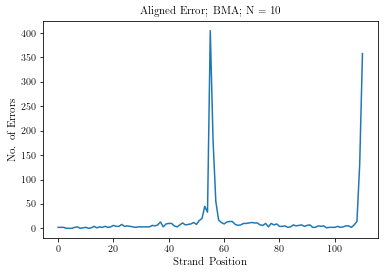

In [13]:
subs, counts = np.unique(pairs, return_counts=True, axis=0)
sorting = np.argsort(counts)
subs = subs[sorting]
counts = counts[sorting]

for sub, count in zip(subs, counts):
    if count > 5:
        print("{} -> {} @ {}".format(sub[0], sub[1], sub[2]), count)

strand_len = 110
pos_counts = [0] * (strand_len + 1)
for sub, count in zip(subs, counts):
    pos_counts[int(sub[2])] += count

print(pos_counts)

f = plt.figure()
plt.plot(range(strand_len + 1), pos_counts)
plt.title(r'Aligned Error; BMA; N = 10', fontsize=11)
plt.xlabel(r'Strand Position', fontsize=11)
plt.ylabel(r'No. of Errors', fontsize=11)
plt.show()
f.savefig('cov10-sab-bma-aligned.pdf', bbox_inches='tight')

In [14]:
subs, counts = np.unique(pairs, return_counts=True, axis=0)
sorting = np.argsort(counts)
subs = subs[sorting]
counts = counts[sorting]


In [15]:
def get_key(char1, char2):
    char1 = char1 if char1 != '' else '_'
    char2 = char2 if char2 != '' else '_'
    return char1 + ' -> ' + char2

strand_len = 110
pos_map = {}
pos_counts = [0] * (strand_len + 1)
for sub, count in zip(subs, counts):
    key = get_key(sub[0], sub[1])
    if key not in pos_map:
        pos_map[key] = [0] * (strand_len + 1)
    pos_map[key][int(sub[2])] += count

In [16]:
sub_keys = [get_key(sub[0], sub[1]) for sub in subs_no_pos]
max_10_keys = sub_keys[-10:]
max_10_counts = counts_no_pos[-10:]


[0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 1, 1, 0, 2, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 2, 0, 3, 1, 1, 2, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 2, 1, 3, 6, 25, 6, 0, 1, 0, 2, 3, 2, 0, 0, 1, 1, 1, 1, 1, 0, 1, 2, 0, 2, 0, 2, 2, 0, 0, 1, 0, 0, 0, 2, 0, 1, 0, 1, 2, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 2, 2, 7, 129]
[0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 2, 0, 0, 2, 13, 7, 72, 15, 3, 1, 0, 0, 0, 0, 3, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 4, 34, 0]
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 2, 0, 1, 0, 1, 0, 2, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 2, 0, 1, 1, 0, 2, 0, 2, 1, 0, 1, 1, 2, 1, 7, 34, 8, 3, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 2, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0,

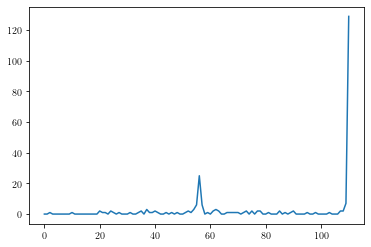

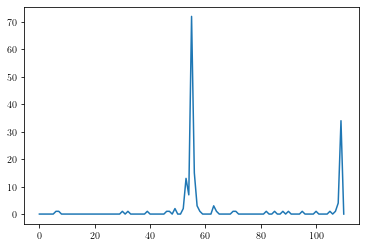

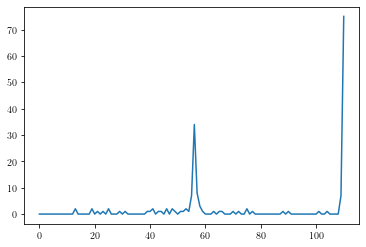

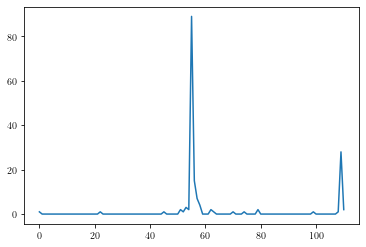

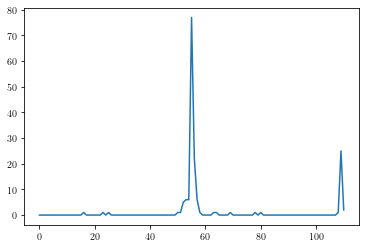

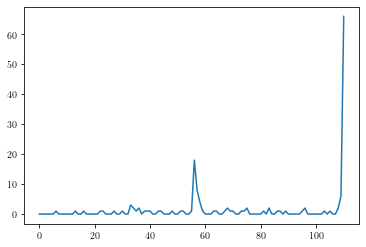

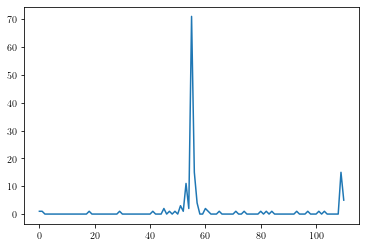

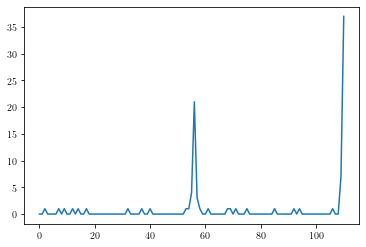

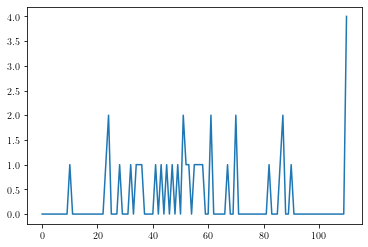

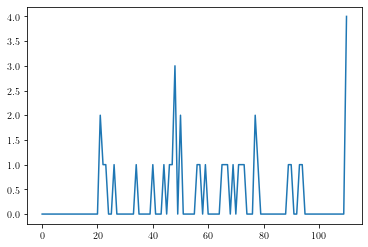

In [17]:
for key, count in zip(reversed(max_10_keys), reversed(max_10_counts)):
    plt.figure(key)
    print(pos_map[key])
    plt.plot(range(strand_len + 1), pos_map[key])

In [18]:
np.save('subs.npy', subs)
np.save('counts.npy', counts)